## BME i9400
## Fall 2024
### Homework 2: Image Compression using Singular Value Decomposition (SVD)


**Due date: Wednesday, October 16th 2024, 11:59:59.999 PM EST**


**Instructions:**
Please complete the assignment by filling in the required functions:
- compress_image (Step 3)
- compression_ratio (Step 6)
- reconstruction_error (Step 6)

You must also complete the cell in Step 4.

In [5]:
from numpy.ma.core import compressed
# Import necessary libraries
from scipy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

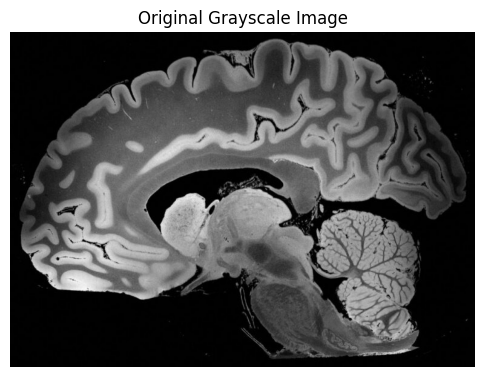

In [6]:
## Step 1 (Done for you)
# The code in this cell should not be modified!
# Load, normalize, and display the grayscale image
image_path = 'brain.jpg'  # Replace with your local image path if necessary
image = Image.open(image_path)  
image_gray = plt.imread(image_path)  # Normalize pixel values to the range [0, 1]
image_gray = (image_gray / 255.0).astype(np.float32)

# Display
plt.figure(figsize=(6, 6))
plt.imshow(image_gray, cmap='gray')  # It's so much prettier in color!
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

In [7]:
# Step 2 (Done for you)
# The code in this cell should not be modified!
# Perform Singular Value Decomposition (SVD)
# Compute SVD of the image
U, Sigma, Vt = svd(image_gray, full_matrices=False)
Sigma_matrix = np.diag(Sigma)

# Print the shape of the decomposed matrices
print(f"Shape of U: {U.shape}")
print(f"Shape of Sigma: {Sigma_matrix.shape}")
print(f"Shape of Vt: {Vt.shape}")

Shape of U: (553, 553)
Shape of Sigma: (553, 553)
Shape of Vt: (553, 768)


In [9]:
# Step 3: Image Compression

## DO THIS STEP ##

# Write a function to reconstruct the image using the top k singular values
def compress_image(U, Sigma_matrix, Vt, k):
    """
    Reconstruct the image using the top k singular values.
    :param U: the left singular vectors
    :param Sigma_matrix: the diagonal matrix of singular values
    :param Vt: the right singular vectors
    :param k: the number of singular values to keep in the compressed image
    :return: The compressed image (a 2D numpy array)
    """
   # Truncate U, Sigma, and Vt to the top k components
    U_k = U[:, :k]
    Sigma_k = Sigma_matrix[:k, :k]
    Vt_k = Vt[:k, :]

    # Reconstruct the image using the top k components
    compressed_image = U_k @ Sigma_k @ Vt_k
    
    return compressed_image
    

In [11]:
# Step 4: Compress the image with different number of singular values
## DO THIS STEP ##

# the values of k to compress the image with
k_values = [5, 20, 50, 100]  # do not modify this list

# create a list that stores the compressed images for different values of k
# the list should be named 'compressed_images'

compressed_images = []
for i in range(len(k_values)):
    k = k_values[i]
    new_compressed_images = compress_image(U, Sigma_matrix, Vt, k)
    compressed_images.append(new_compressed_images)


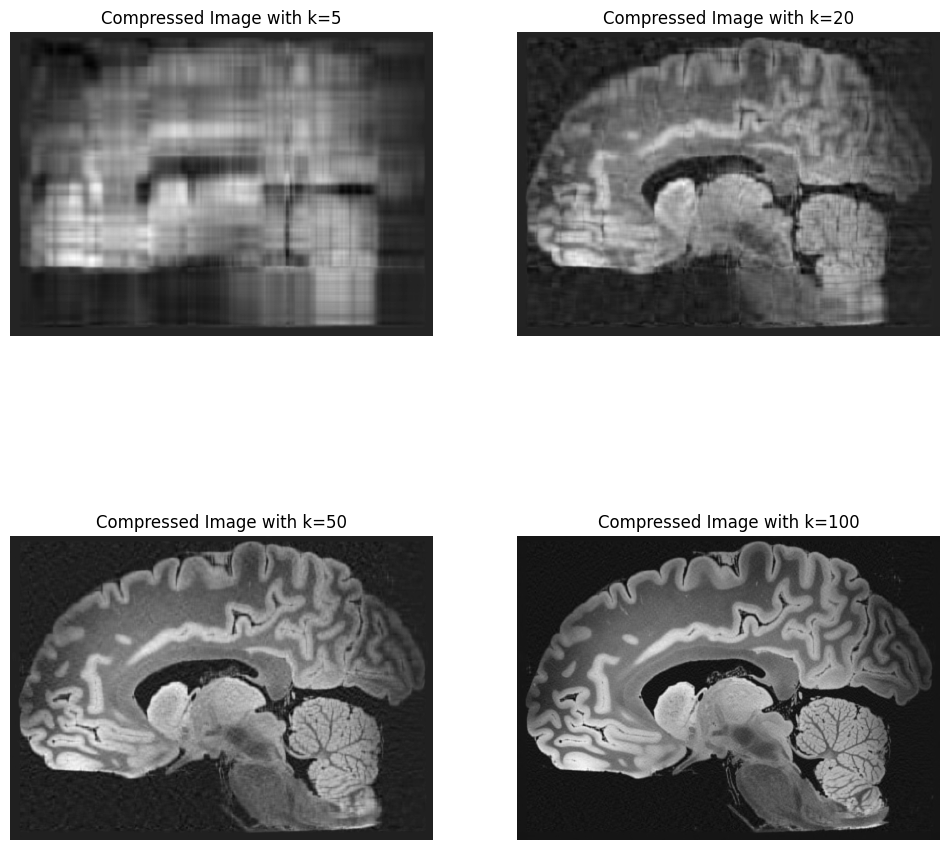

In [12]:
# Step 5 (Done for you) 
# Display the compressed images
# The code below should not be modified!
plt.figure(figsize=(12, 12))
for i, k in enumerate(k_values):
    plt.subplot(2, 2, i + 1)
    plt.imshow(compressed_images[i], cmap='gray')
    plt.title(f"Compressed Image with k={k}")
    plt.axis('off')
plt.show()

In [14]:
# Step 6: Write functions to compute the compression ratio and reconstruction error

## DO THIS STEP ##

def compression_ratio(k, original_size):
    """
    Calculate the compression ratio as the fraction of the number of stored values.
    :param k: the number of singular values to keep in the compressed image
    :param original_size: the number of pixels in the original image
    :return: 
    """
    # Calculate the number of values stored in the compressed image
    # Store the result in a variable named 'compressed_size'
    compressed_size = k * (U.shape[0] + Vt.shape[1] + 1)
    
    # Return the ratio of the original size to the compressed size
    return original_size / compressed_size

test = compression_ratio(4, image_gray.size)
print(test)

def reconstruction_error(original, compressed):
    """
    Calculate the reconstruction error as the Frobenius norm of the difference between the original and compressed image.
    Normalize the ratio by the Frobenius norm of the original image.
    Multiply by 100 to get the percentage error.
    :param original: the original image
    :param compressed: the compressed image
    :return: 
    """
    # Calculate the Frobenius norm of the difference between the original and compressed image
    
    frobenious_norm = np.linalg.norm(original - compressed)
    
    # Calculate the percentage error: 
    percentage_error = frobenious_norm / np.linalg.norm(original) * 100
    
    # return the percentage error
    return percentage_error

reconstruction_error(image_gray, compressed_images[0])

80.31467473524962


31.221804022789

In [15]:
# Step 7 (Done for you): 
# Print the compression ratio and reconstruction error for different values of k
# The code in this cell should not be modified!

# Compute original size (number of pixels)
original_size = image_gray.size

ratios = []
errors = []
for i, k in enumerate(k_values):
    ratio = compression_ratio(k, original_size)
    error = reconstruction_error(image_gray, compressed_images[i])
    ratios.append(ratio)
    errors.append(error)
    print(f"For k={k}, Compression Ratio: {ratio:.2f}, Reconstruction Error: {error:.2f}%")

For k=5, Compression Ratio: 64.25, Reconstruction Error: 31.22%
For k=20, Compression Ratio: 16.06, Reconstruction Error: 18.57%
For k=50, Compression Ratio: 6.43, Reconstruction Error: 10.57%
For k=100, Compression Ratio: 3.21, Reconstruction Error: 5.89%


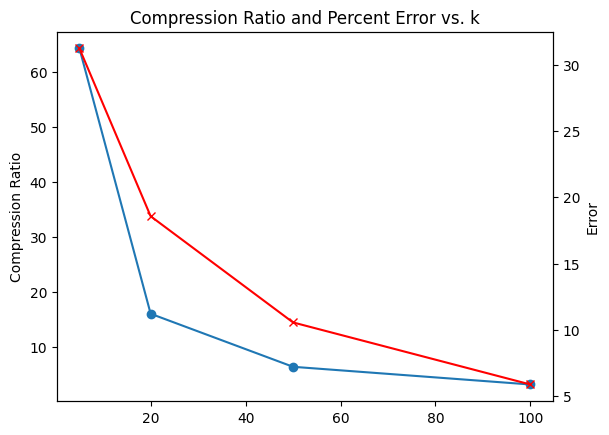

In [16]:
## Step 8 (Done for you): 
# Plot the compression ratio and reconstruction error
plt.plot(k_values, ratios, marker='o')
plt.ylabel('Compression Ratio')
plt.twinx()
plt.plot(k_values, errors, marker='x', color='r')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Compression Ratio and Percent Error vs. k')
plt.show()